# Global Explanations

# Imports and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import shap
from lime.lime_tabular import LimeTabularExplainer

import joblib

## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

SEED = 321
np.random.seed(SEED)

# Load in the Dataset with the Saved Joblib File

In [2]:
# load model from pre-saved joblib file
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'DecisionTreeRegressor'])

In [3]:
# save parameters to variables
preprocessor = loaded_joblib['preprocessor']
X_train_df2 = loaded_joblib['X_train']
y_train_df2 = loaded_joblib['y_train']
X_test_df2 = loaded_joblib['X_test']
y_test_df2 = loaded_joblib['y_test']
DecisionTreeRegressor = loaded_joblib['DecisionTreeRegressor']

 # Explain tree-based model with shap

In [4]:
len(X_train_df2)

6392

In [5]:
X_train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Outlet_Establishment_Year        6392 non-null   float64
 4   Item_Fat_Content_Low Fat         6392 non-null   float64
 5   Item_Fat_Content_Regular         6392 non-null   float64
 6   Item_Type_Baking Goods           6392 non-null   float64
 7   Item_Type_Breads                 6392 non-null   float64
 8   Item_Type_Breakfast              6392 non-null   float64
 9   Item_Type_Canned                 6392 non-null   float64
 10  Item_Type_Dairy                  6392 non-null   float64
 11  Item_Type_Frozen Foods           6392 non-null   float64
 12  Item_Type_Fruits 

In [6]:
X_shap = shap.sample(X_train_df2,nsamples=500,random_state=321)
X_shap.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3888,0.698654,0.873252,-1.677139,1.089517,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2497,0.520761,0.418566,1.275305,-0.102145,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7723,1.090017,-0.986085,0.684178,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8117,-0.499157,-0.316610,1.616527,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7475,0.497042,-0.410893,-0.023898,0.493686,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [7]:
X_train_df2.index

Int64Index([4776, 7510, 5828, 5327, 4810, 4377, 2280, 8198, 7514, 3463,
            ...
            8322, 5578, 4426,  466, 6265, 5734, 5191, 5390,  860, 7270],
           dtype='int64', length=6392)

In [8]:
y_train_df2.index

Int64Index([4776, 7510, 5828, 5327, 4810, 4377, 2280, 8198, 7514, 3463,
            ...
            8322, 5578, 4426,  466, 6265, 5734, 5191, 5390,  860, 7270],
           dtype='int64', length=6392)

In [9]:
## get the corresponding y-values
y_shap = y_train_df2.loc[X_shap.index]
y_shap.head()

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
Name: Item_Outlet_Sales, dtype: float64

In [10]:
explainer = shap.Explainer(DecisionTreeRegressor)
explainer

In [11]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(500, 32)

# Bar Summary Plot

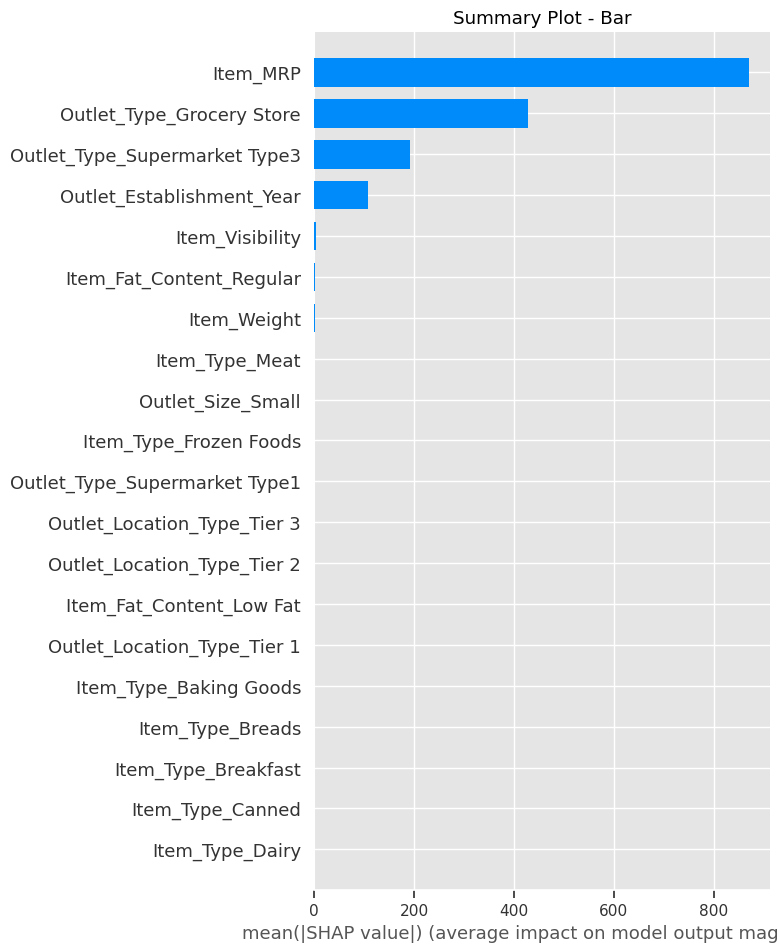

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show = False)
ax.set_title('Summary Plot - Bar');
fig.savefig('Summary_Plot_Bar.png')

# Compare the most important features- SHAP v. Original Feature Importance

# Dot Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


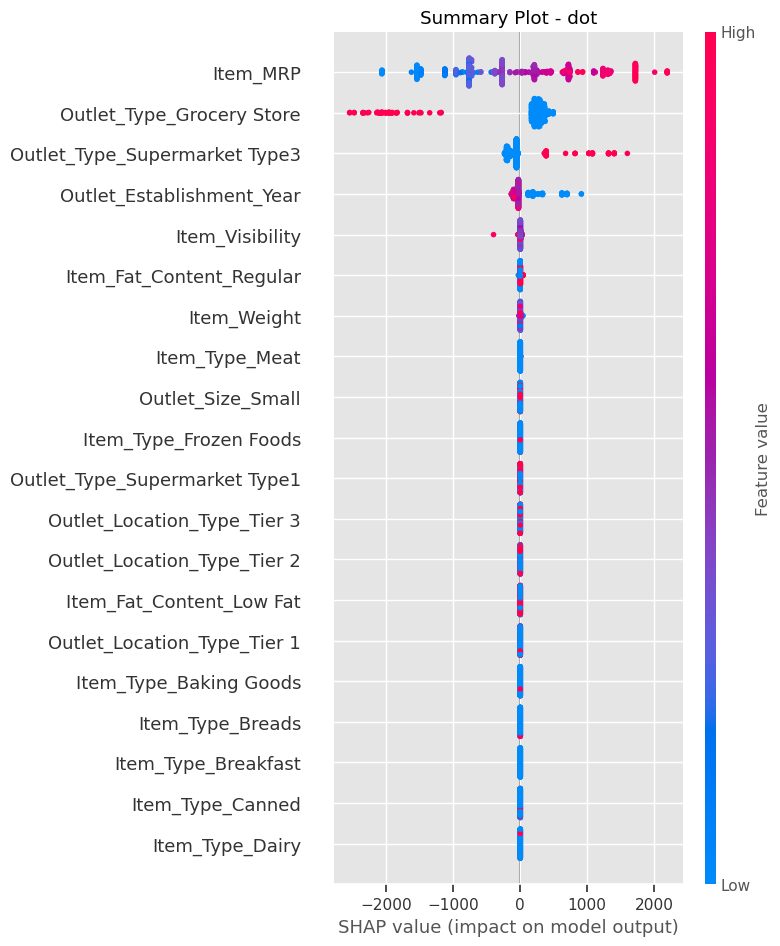

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show = False)
ax.set_title('Summary Plot - dot');
fig.savefig('Summary_Plot_dot.png')

# Top 3 Most Important Features Interpreted

# Global Force Plot

In [14]:
## Global Forceplot
shap.force_plot(explainer.expected_value,shap_values.values,features=X_shap)

# Local Expanations